# TUTORIAL - Recurrent Neural Networks using TensorFlow

**Tutorial Summary**
1. Introduce TensorFlow to understand the Recurrent Neural Network Implementation.
    1. A brief introduction to TensorFlow
    2. Linear Regression using TensorFLow
2. Recurrent Neural Networks
    1. Theoritical understanding of Recurrent Neural Networks
    2. A simple example to showing the use RNNs
    3. A working example to apply RNNs in a data science problem

In [317]:
# Import relevant libraries
import data_loader
import functools
from IPython.display import *
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.contrib import rnn
sns.set_style("white")

## Part I : TensorFlow Introduction
In this part, we will walk through simple examples of TensorFlow codes to get you started. Please **skip** this part if you are already comfortable with TensorFlow.
* TensorFlow is a tool for machine learning. While it contains a wide range of functionality, TensorFlow is mainly designed for **deep neural network** models.
* TensorFlow computations are expressed as **stateful dataflow graphs**. 
* The name TensorFlow derives from the operations that such neural networks perform on multidimensional data arrays. 
* These arrays are referred to as **"tensors"**.
* To deep dive, get the complete tutorial for TensorFlow <a href="https://www.tensorflow.org/get_started/">here</a>.

** What does TensorFlow actually do? **

*TensorFlow provides primitives for
defining functions on tensors and
automatically computing their derivatives.*

In this tutorial, we will brush up few data structures and scopes in TensorFlow.

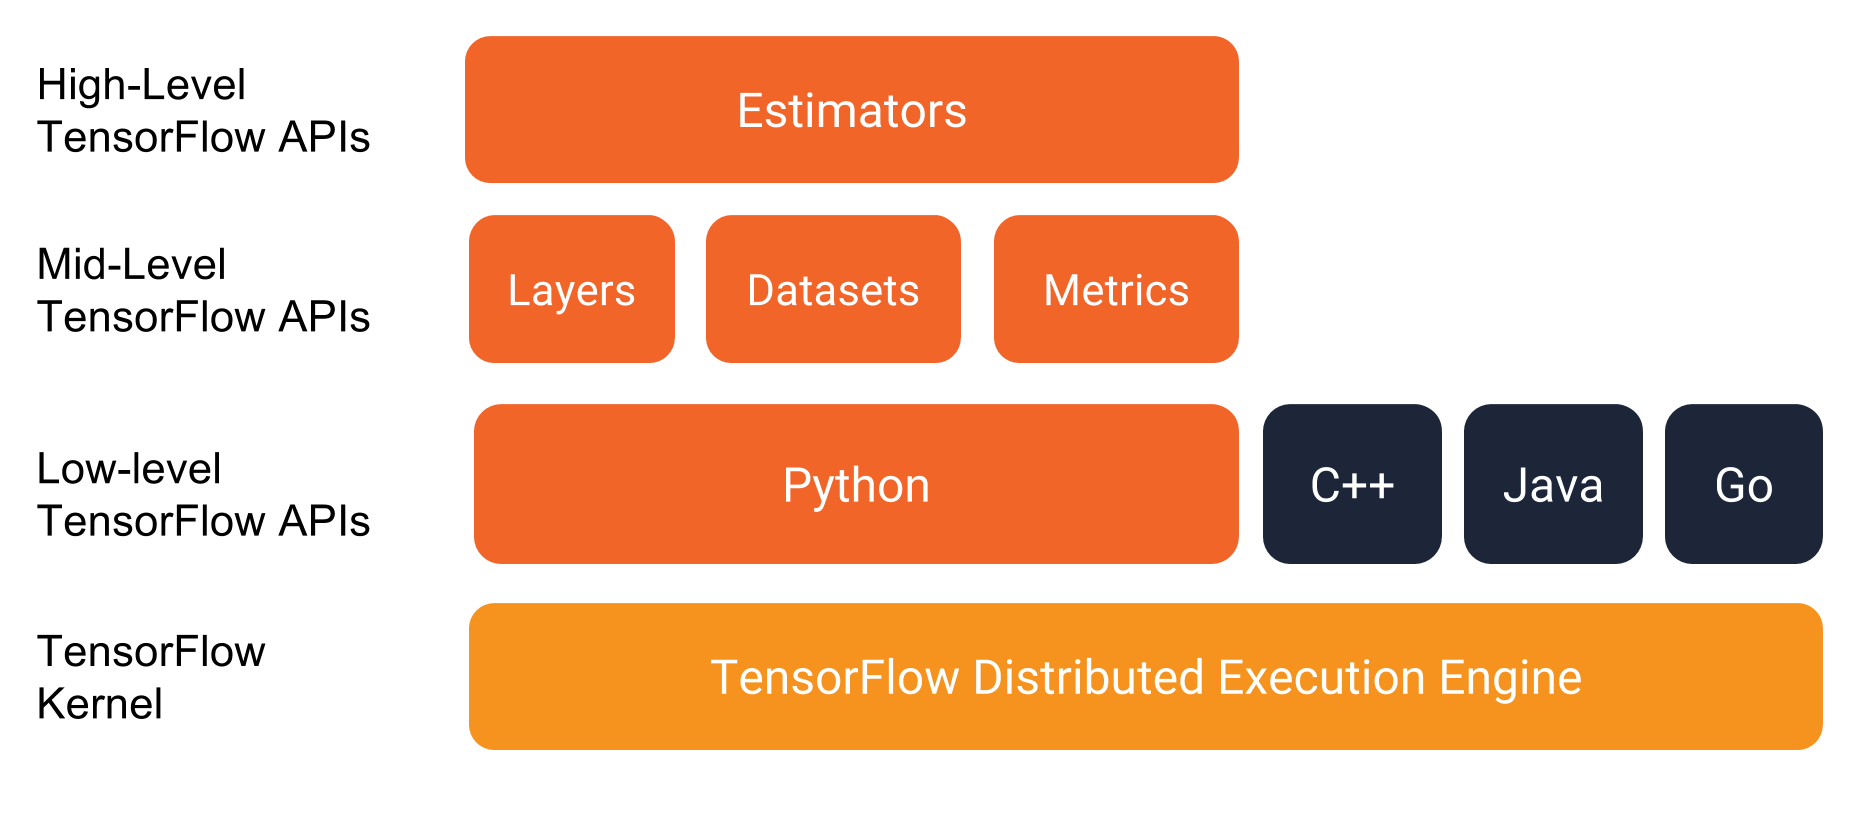

In [295]:
Image("https://www.tensorflow.org/images/tensorflow_programming_environment.png")

The Figure above shows the **programming stack** consisting of multiple API layers.
1. High-Level APIs (Estimators): They encaptulate the train, prediction, evaluation, and exportation of your model and greatly simplify ML coding.
2. Mid-Level APIs: Allows you to easily load, manipulate, and pipe your data. Also, it provides various metrics for your data.
3. Low-Level APIs: Lets you develop your own TensorFlow graph, manage sessions, etc.

In [299]:
# Initializing a vector in TensorFlow
a = tf.zeros((2,2))
b = tf.ones((2,2))
# Summing a vector
c = tf.reduce_sum(b, reduction_indices=[1])
# Dot Product
d = tf.matmul(a,b)
'''
Variables - Must be initialized before they have values
When you use tf.Variable, a new variable is created.
'''
var_a = tf.Variable(tf.random_normal((2,2)), name = "random_vars")
# Getting external data into TensorFlow
'''
Approach 1: Using Numpy
This approach works but doesnt SCALE
'''
array_external = np.ones((3,3))
var_external   = tf.convert_to_tensor(array_external)
'''
Approach 2: Use placeholders
Provide entry points for data to computation graph
'''
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)
'''
We defined a lot of computations above, but they have no value until they are evaluated.
To Evaluate them we need to run a TensorFlow Session.
** A Session object encapsulates the environment in which Tensor objects are evaluated** - TensorFlow Docs
'''
with tf.Session() as sess:
    # The following statement should print the output of c : the sum of vectors we defined above
    print("Sum of vectors : {}".format(sess.run(c)))
    # print the matrix multiplication
    print("Product of vectors : \n{}".format(sess.run(d)))
    # To use vaeiables you need to initialize them first.
    sess.run(tf.global_variables_initializer())
    # print the value of the random variable
    print("Randomly initialized vector : \n{}".format(sess.run(var_a)))
    # Fetching variable state i.e. getting the value of the variables
    # you can pass a list to session to get the state of multiple objects
    ta, tb, tc = sess.run([c, var_a, var_external])
    print("variable c is : {}".format(ta))
    print("variable var_a is : \n{}".format(tb))
    print("variable var_external is : \n{}".format(tc))
    #using PlaceHolder
    #feed_dict can help you pass the values to the placeholders
    td = sess.run([output], feed_dict={input1:[7.], input2:[2.]})
    print("The result of mulitplcation is : {}".format(td))

Sum of vectors : [2. 2.]
Product of vectors : 
[[0. 0.]
 [0. 0.]]
Randomly initialized vector : 
[[-0.17303146 -0.5349036 ]
 [ 0.2861978  -1.3128196 ]]
variable c is : [2. 2.]
variable var_a is : 
[[-0.17303146 -0.5349036 ]
 [ 0.2861978  -1.3128196 ]]
variable var_external is : 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
The result of mulitplcation is : [array([14.], dtype=float32)]


### TensorFlow usually has two phases
1. Construction - construction of the Computation Graph
2. Execution    - Use session to execute the operations in the computation Graph

### Basic Linear Regression using TensorFlow

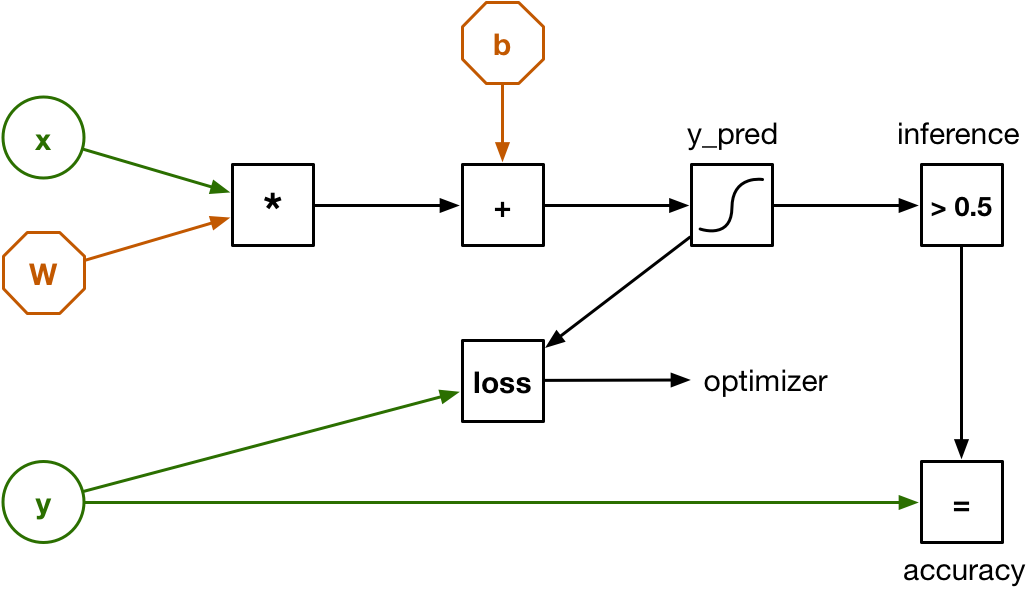

In [276]:
Image("http://machinethink.net/images/tensorflow-on-ios/ComputationalGraph@2x.png")

Iteration 0 : Loss : 333.18975830078125
Iteration 100 : Loss : 53.96170425415039
Iteration 200 : Loss : 45.09535598754883
Iteration 300 : Loss : 36.07881546020508
Iteration 400 : Loss : 45.32888412475586


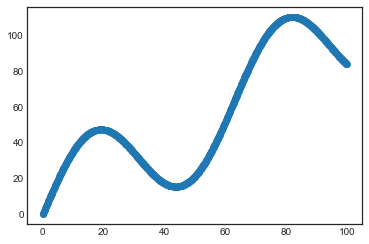

In [267]:
'''
A simple linear regression class using tensorflow
'''
tf.reset_default_graph()
# Generate Data
data = np.arange(100, step=.1)
target = data + 30*np.sin(data/10)
n_samples = 1000
batch_size = 100
# Show the data
sns.regplot(data, target, fit_reg=False)

# Reshape data - always take care of the shape of the data
# TensorFlow is finicky about shapes
data = np.reshape(data, (n_samples, 1))
target = np.reshape(target, (n_samples, 1))
                  
# Create placeholders for each batch of training data
# As shown in the last example, we are creating placeholders for the batch of data
# we will get to train our linear regression.
X = tf.placeholder(tf.float32, shape = (batch_size, 1))
y = tf.placeholder(tf.float32, shape = (batch_size, 1))

# Initialize weights and biases
# Here we are defining a scope for our variables so that can be easily accessed from any part
# of the program without passing references.
with tf.variable_scope("linear-regression"):
    # get_variable will create a new variable named "weights", if you set reuse=True, then it'll try to find a 
    # variable already named "weights"
    W = tf.get_variable("weights", shape=(1,1), initializer=tf.random_normal_initializer() )
    b = tf.get_variable("bias", shape = (1,), initializer=tf.constant_initializer(0.0))
    # The linear regression equation
    y_pred = tf.matmul(X, W) + b
    # Loss function is the mean squared loss
    loss = tf.reduce_sum((y - y_pred) ** 2/n_samples)
    
# Define an optimizer
opt = tf.train.AdamOptimizer(learning_rate=.01)
optimizer = opt.minimize(loss) # loss variable is visible here because of the tensorflow scope

# Get the final weights
final_w = None
final_b = None
loss_dat = []
# Start a tensorflow session to execute the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Run for 500 iterations
    for i in range(500):
        indices = np.random.choice(n_samples, batch_size)
        xb, yb = data[indices], target[indices]
        _, loss_val = sess.run([optimizer, loss], feed_dict={X:xb, y:yb })
        loss_dat.append(loss_val)
        if i % 100 == 0:
            print("Iteration {0} : Loss : {1}".format(i, loss_val))
    # Get the final weights of the trained model
    final_w, final_b = sess.run([W, b])

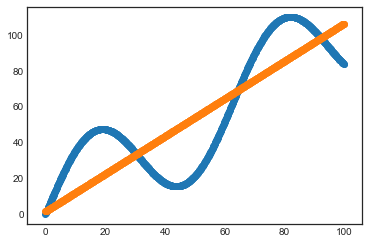

In [268]:
# Plot the regression line
plt.scatter(data,target)
pred = final_w*data + final_b
plt.scatter(data, pred)

In the example above, we saw how easily we can solve linear regression using TensorFlow and how TensorFlow does all the heavy lifting

## Part II : Recurrent Neural Networks

Before we talk about the internal workings of a RNN, I would like to show you some fun examples using RNN

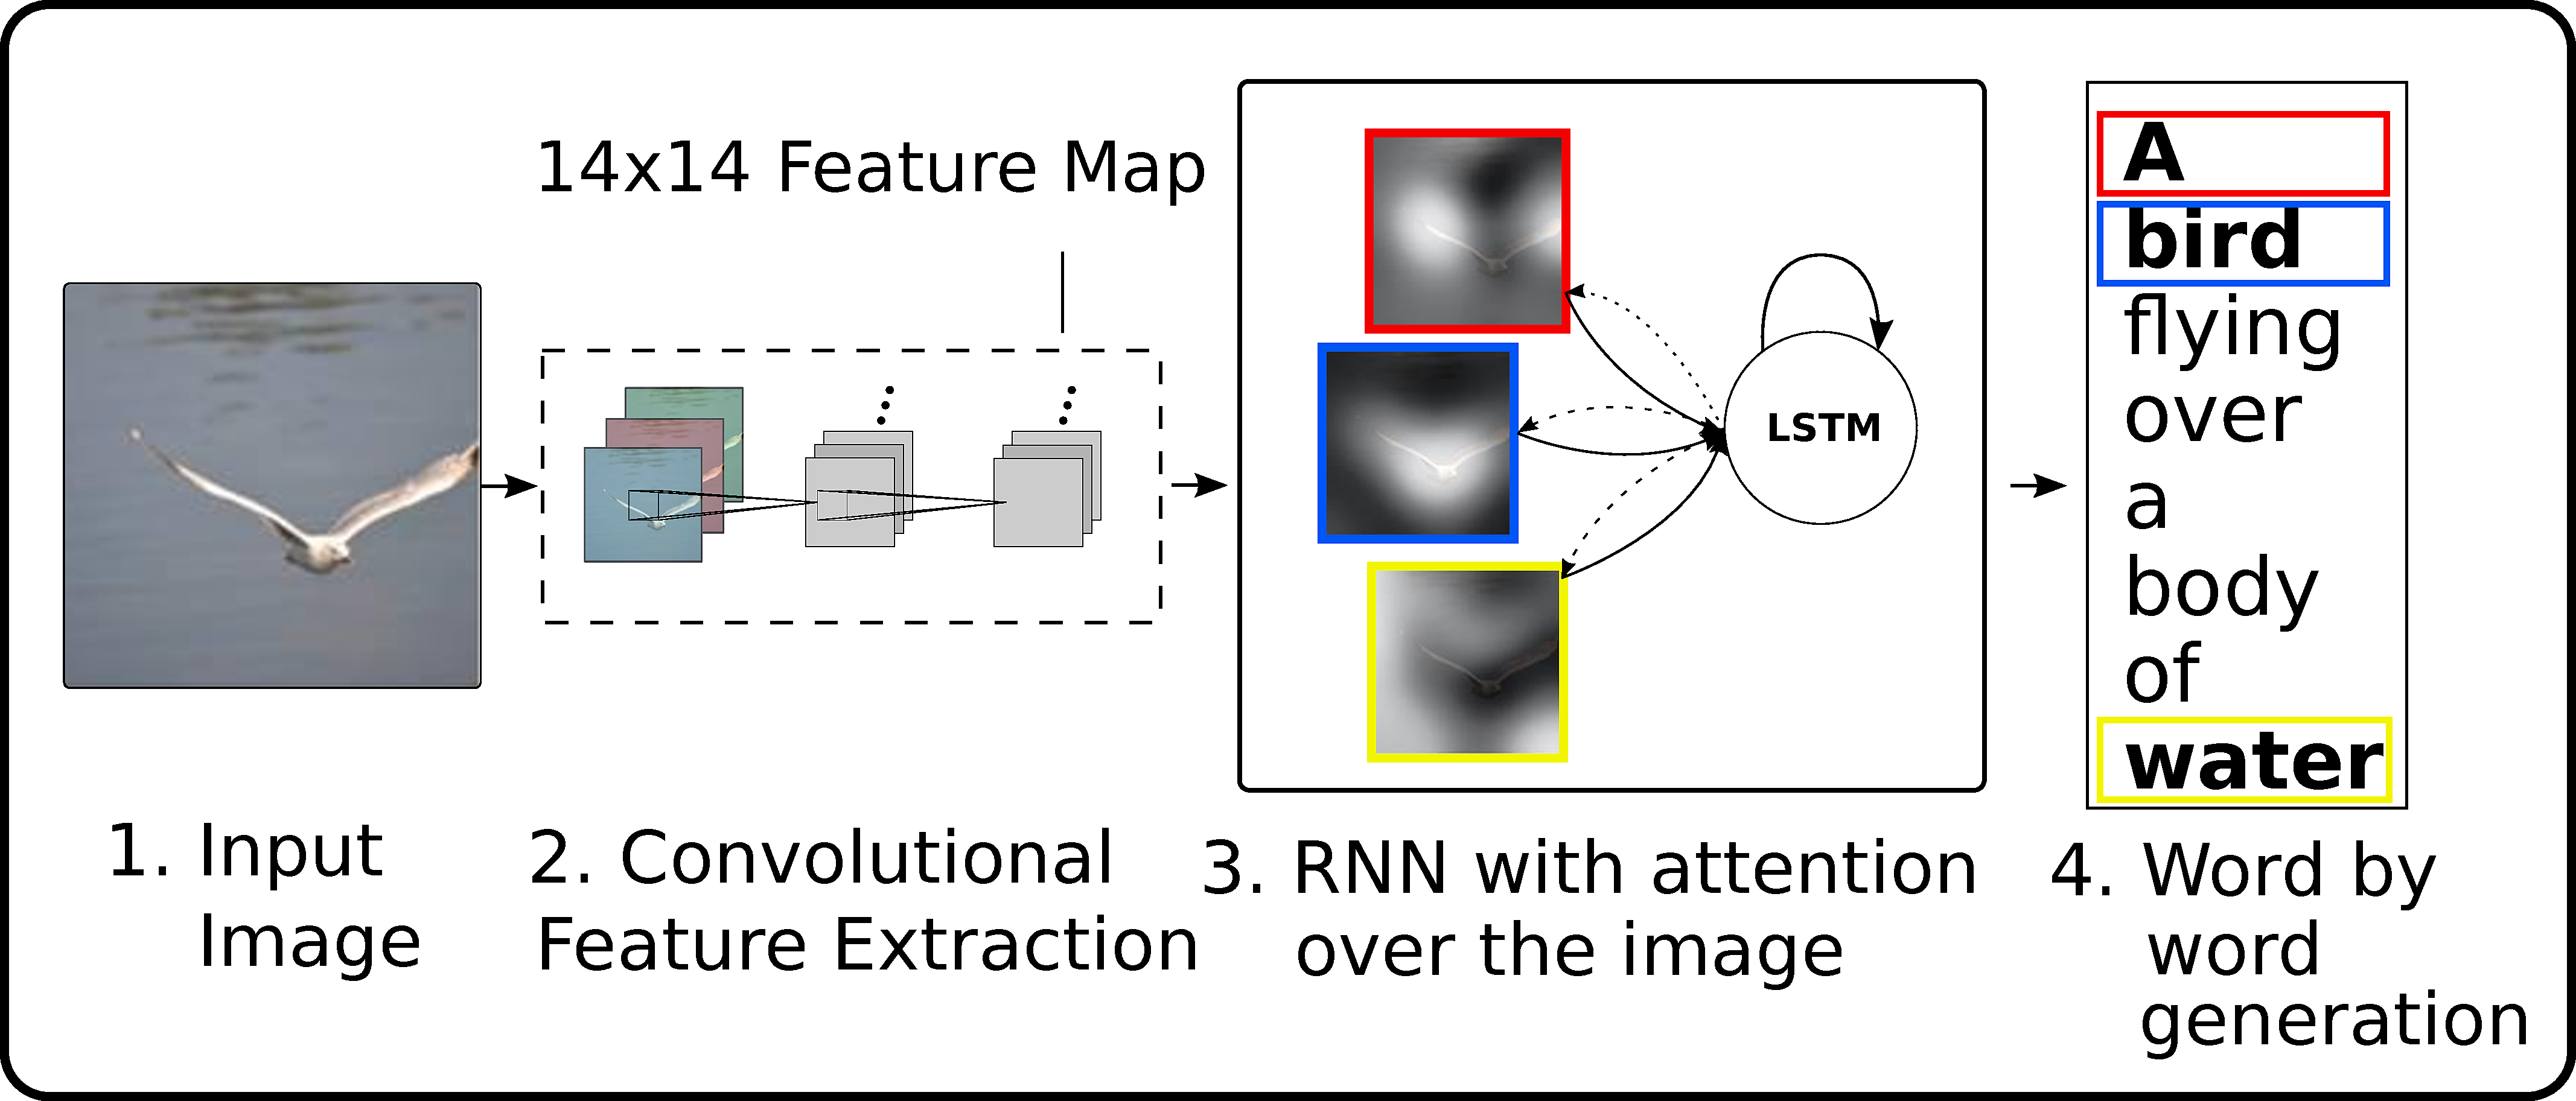

In [306]:
# Image captioning - how cool is that!
Image("http://kelvinxu.github.io/projects/diags/model_diag.png")

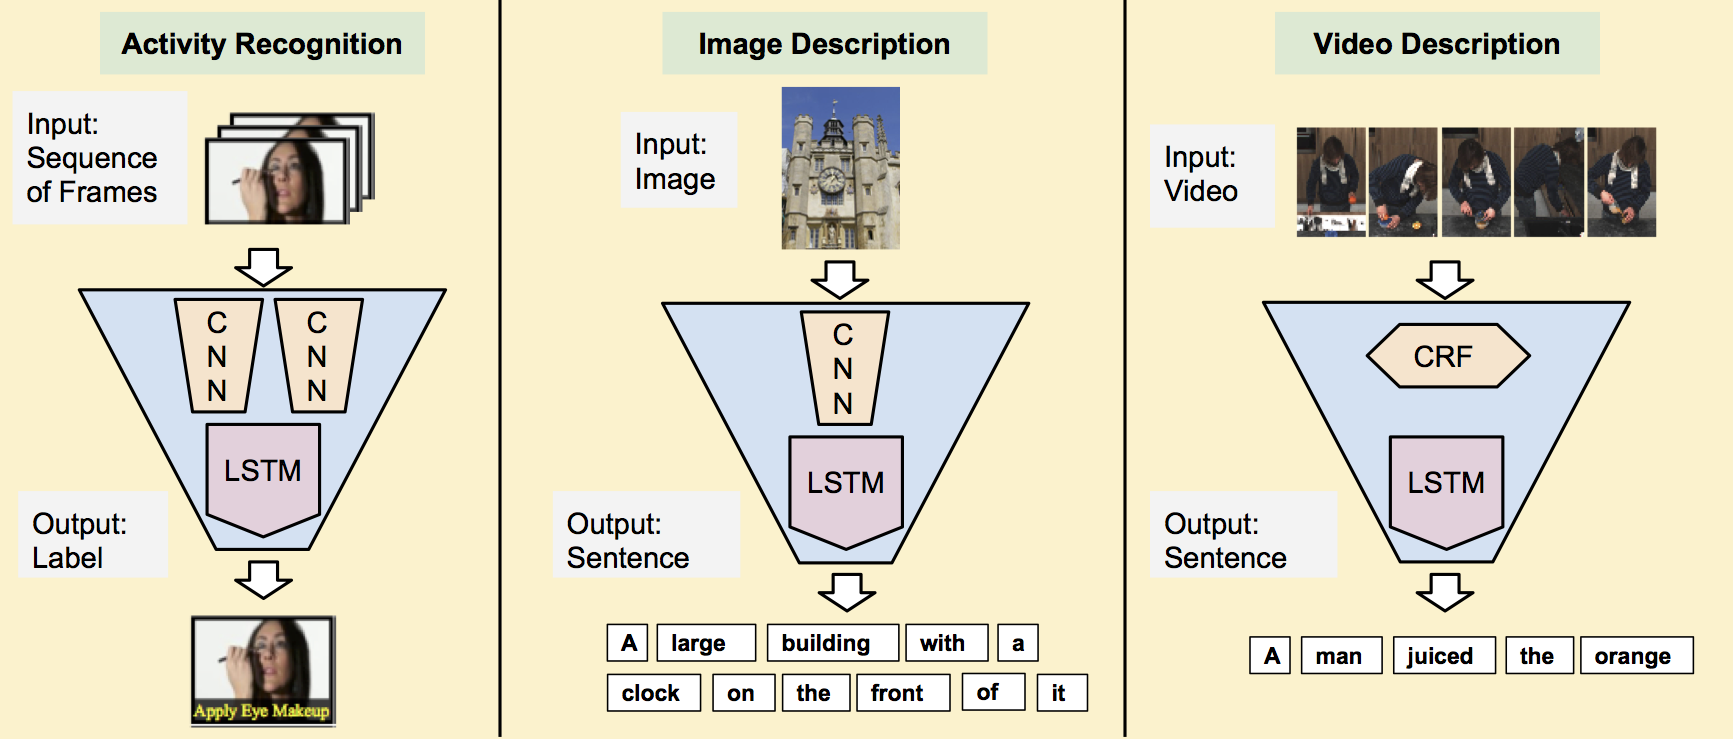

In [308]:
# Activity Recognition/Image Descriotion/Video Description using RNN
Image("http://jeffdonahue.com/lrcn/images/lrcn_tasks.png")

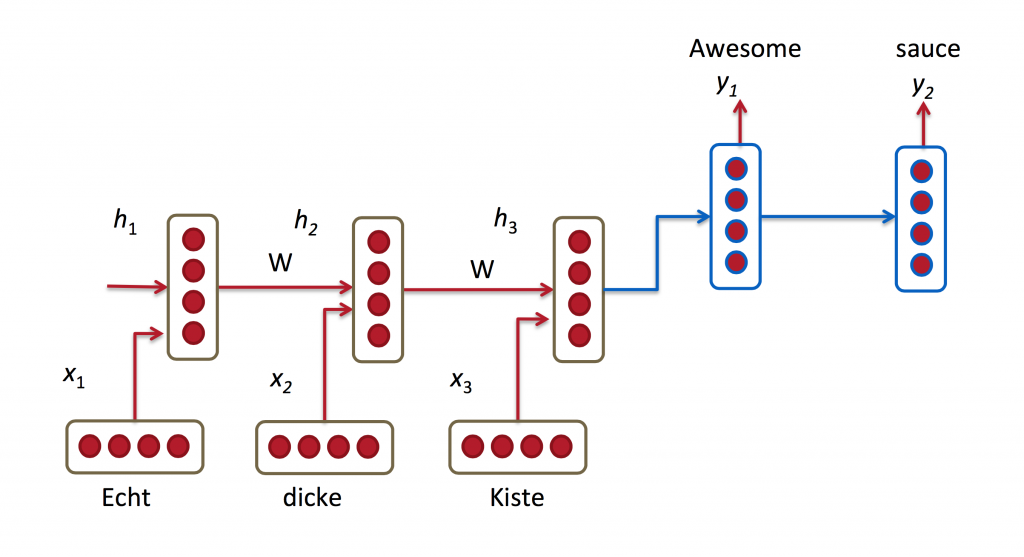

In [322]:
# Machine Translation
Image("https://i.stack.imgur.com/axOLp.png")

**Motivated?** RNN's sound super cool and the prospects of using it are numerous. How that you understand the end goal, lets see how to tackle the basics to design a RNN

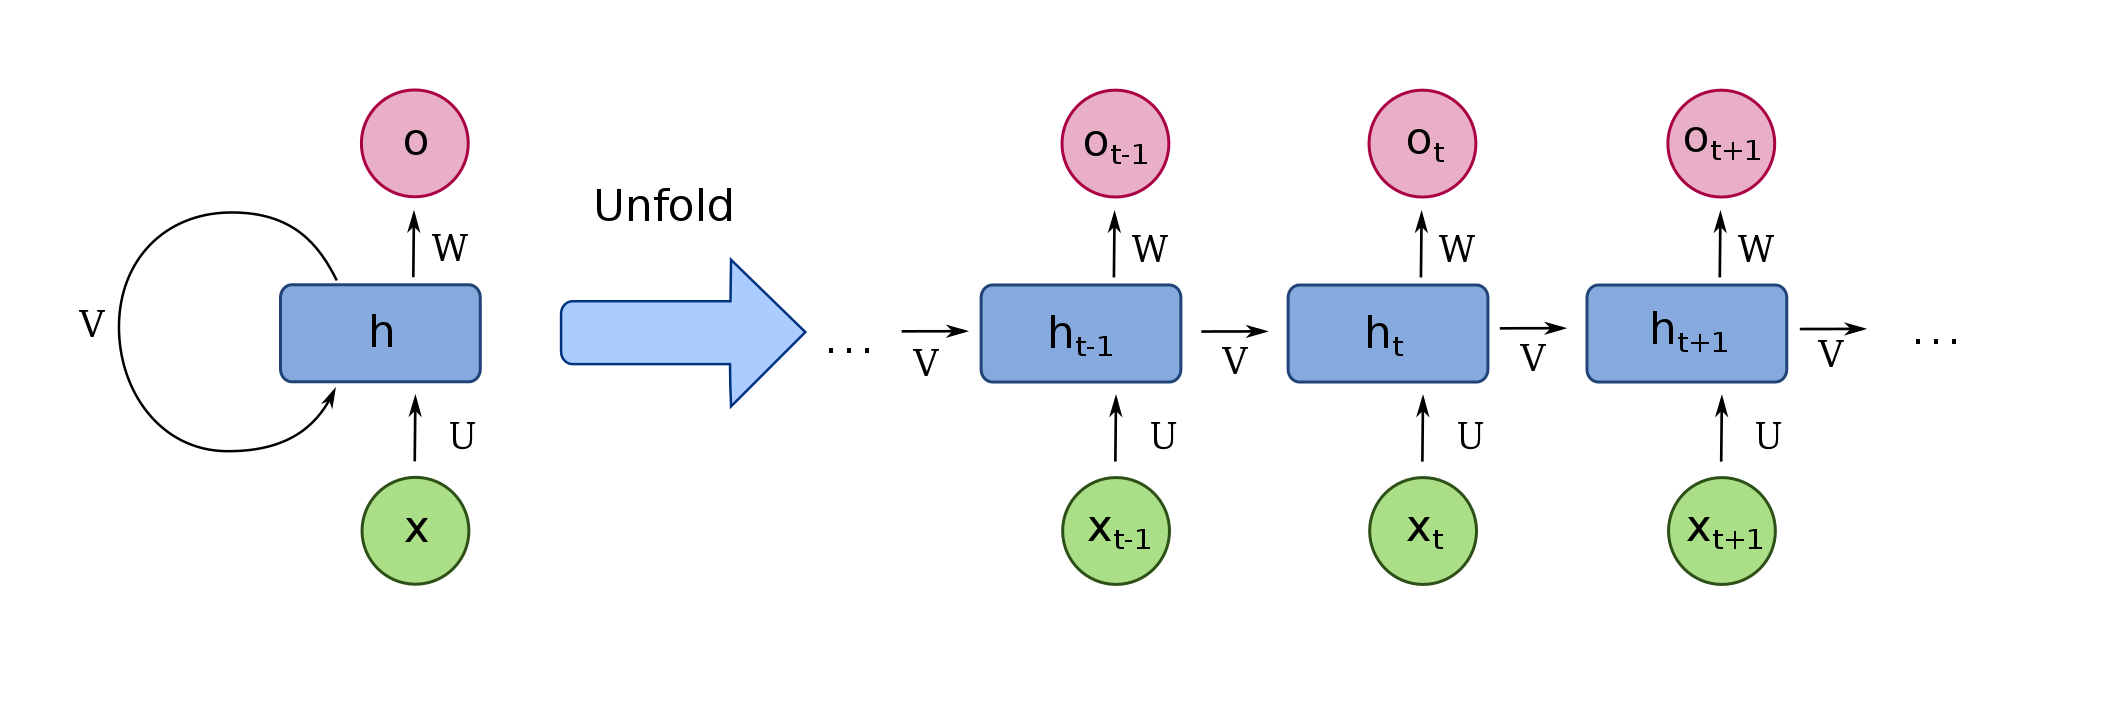

In [303]:
# Fig 1:
Image("https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/2126px-Recurrent_neural_network_unfold.svg.png")

**FIG 1** : Unfolding of a recurrent neural network

1. Introduction to Recurrent Neural Networks
    * A tradition neural network or even Convulutional Neural Networks are limited by the fact that they can only take fixed length inputs and produce some fixed set of outputs (Fig 1.1). However, RNNs allow us to operate over a sequences of vectors: sequences of inputs, outputs, or both. As shown in the (Fig 1.1 - 1.5) below, we can see the varied uses of Recurrent Neural Networks. This exciting feature of RNNs inspired me to write this tutorial to help understand its benefits and uses.
    
    * A great quote[http://colah.github.io/posts/2015–08-Understanding-LSTMs/] that I came across while preparing this tutorial describes RNNs in a logical way.
    
    ***"Humans don’t start their thinking from scratch every second. As you read this essay, you understand each word based on your understanding of previous words. You don’t throw everything away and start thinking from scratch again. Your thoughts have persistence."***
    
2. A Recurrent Neural Network is different from traditional networks in the sense that it introduces a transition weight W to transfer inforamation over time. **FIG 3** shows all the weights that we learn in a RNN. The introduction of the new weight means that the model is now dependent on previous model as well as previous state. To understand the concepts more clearly, we will go through an example using TensorFlow, but I strongly recommend you to go through the mathematical background. Some good papers/articles could be found in the references section of this notebook.

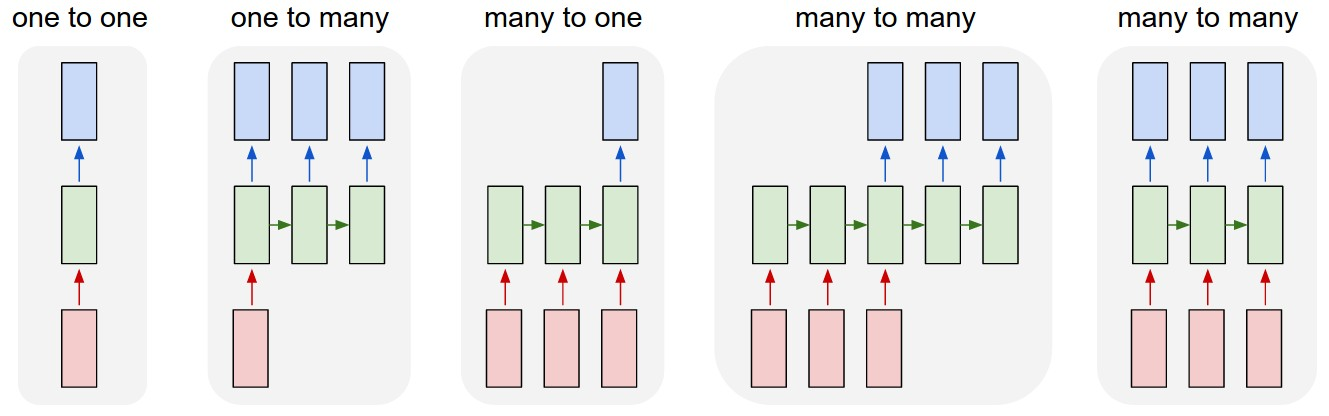

In [304]:
Image("http://karpathy.github.io/assets/rnn/diags.jpeg")

**Fig 2.** The arrows in the figure represent functions such as matrix multiplication or sigmoid. *red* boxes show inputs, *green* boxes show RNNs state, *blue* boxes show the outputs. 

(**from left to right**)
1. A vanilla neural network with fixed input and fixed output.
2. A sequential output (e.g. in image captioning, the output will be a series or words describing the image)
3. Sequential input (e.g. sentiment analysis, the output is the result of processing sequences to conclude the sentiment is positive or negative)
4. Sequential input and output (e.g. machine translation from **English** to **German**)
5. Synced Sequence input and output (e.g. lets say we want to descibe each frame of video)

## RNN - A bit of theory!

Traditional neural networks are proven to be universal function approximators. I'm not proving it here, but you can take a look at <a href="http://neuralnetworksanddeeplearning.com/chap4.html">this</a> page to understand what it means. However, RNNs are a step ahead and, with all capabilities of vanilla neural networks, can describe or compute programs. Also, RNNs are considered to be **Turing Complete**. Given all the facts that I talked about you can be rest assured that RNNs can have potentially massive future impact and you should read this tutorial and keep involved in RNNs.

Formally, we can describe RNN as follows - 

If the input and output has a value a time t, 
1. Input - $x_t$
2. Output - $y_t$
3. Hidden - $h^l_t$ where $l$ denotes the $l^{th}$ hidden layer

Now consider the most complex RNN that we have seen in **FIG 2.4**. Below we will discuss the final output and not its derivation - 

4. Final Output - $y_t = W_{hy}h^l_t + b_y$

where,

$h^l_t = tanh(W^l_{hht}h^l_{t-1} + W^l_{hhd}h^{l-1}_t + b^l_h) $ for $l > 1$

$h^l_t = tanh(W^l_{hht}h^l_{t-1} + W_{xh}x_t + b^l_h) $ for $l = 1$

$W_{xh}$ : weight matrix - input to hidden

$W^l_{hht}$ :  weight matrix - hidden to hidden in time

$W^l_{hhd}$ :  weight matrix - hidden to hidden in depth

$W_{hy}$:  weight matrix - hidden to output

$b^l_h , b^l_y$ : biases


### Vanishing Gradient Problem
While training neural networks, we take gradient descent optimization steps. Given the large number of weights that we need to consider during each iteration, we apply backpropagattion to adjust each weight with iterations. Given that RNNs unfolds as a feed forward network (**FIG 1**), we can get very deep networks when we use RNNs. The gradients, therefore, vanish very quickly while training RNNs and they become almost impossible to train. This <a href="https://ayearofai.com/rohan-4-the-vanishing-gradient-problem-ec68f76ffb9b"> article </a> talks deeply on vanishing gradient problem.

To combat this, we use LSTMs (Long Short Term Memory) networks -  a special kind of RNN, capable of learning long-term dependencies. Follow this <a href="http://colah.github.io/posts/2015-08-Understanding-LSTMs/">article</a> to get a clear understanding of LSTMs. 

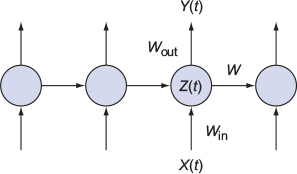

In [305]:
Image("https://dpzbhybb2pdcj.cloudfront.net/shukla/Figures/10fig04.jpg")

**FIG 3** : Weights to learn in RNNs

### A simple example to show the workings of Recurrent Neural Networks
The primary benefit of RNNs is that it works on series or ***temporal*** data. In the following **toy** example we will see what that means using an example.
Also, notice that all the commands used in the example are made up of very simple commands and data structures that we learned to use previously.

In [282]:
class rnn_example:
    def __init__(self, input_dim, seq_size, hidden_dim=100):
        '''
        Initialize the hyperparameters required to configure a RNN.
        '''
        #Hyperparameters
        self.input_dim = input_dim
        self.seq_size = seq_size
        self.hidden_dim = hidden_dim
        '''
        We saw in the previous section that we need to the transition weights and biases
        '''
        #weight variables and input placeholders
        self.W_out = tf.Variable(tf.random_normal([hidden_dim,1]), name = 'W_out')
        self.b_out = tf.Variable(tf.constant(0.0), name='b_out')
        self.x = tf.placeholder(tf.float32, [None, seq_size, input_dim])
        self.y = tf.placeholder(tf.float32, [None, seq_size])
        
        #Cost optimization
        self.cost = tf.reduce_mean(tf.square(self.model() - self.y))
        self.opt  = tf.train.AdamOptimizer(.01).minimize(self.cost)
        
        # Auxiliary ops
        self.saver = tf.train.Saver()
        
    def model(self):
        """
        :param x: input of size [T, batch_size, input_size]
        :param w: matrix of fully connected output layer weights
        :param b: vector of fully connected output layer biases
        """
        cell = rnn.BasicLSTMCell(self.hidden_dim)
        # Runs the cell on the input to obtain tensors for outputs and states
        outputs, states = tf.nn.dynamic_rnn(cell, self.x, dtype=tf.float32)
        num_examples = tf.shape(self.x)[0]
        # Computes the output layer as a fully connected linear function
        W_repeated = tf.tile(tf.expand_dims(self.W_out, 0), [num_examples,1,1])
        out = tf.matmul(outputs, W_repeated) + self.b_out
        out = tf.squeeze(out)
        return out
    
    def train(self, train_x, train_y):
        '''
        After defining the model, we can now train our model
        '''
        with tf.Session() as sess:
            tf.get_variable_scope().reuse_variables()
            sess.run(tf.global_variables_initializer())
            mse_data = []
            for i in range(1000):
                _, mse = sess.run([self.opt, self.cost], feed_dict={self.x: train_x, self.y:train_y})
                mse_data.append(mse)
                if (i % 100 == 0):
                    print("Iteration {0} , Error {1}".format(i,mse))
            # After training, we are saving the model to file that so that we can access it later.
            save_path = self.saver.save(sess, './model.ckpt')
            print('Model saved : {}'.format(save_path))
            plt.scatter([x for x in range(1000)], mse_data)
            
    def test(self, test_x):
        '''
        Test our model - for toy example.
        '''
        with tf.Session() as sess:
            tf.get_variable_scope().reuse_variables()
            self.saver.restore(sess, "./model.ckpt")
            output = sess.run(self.model(), feed_dict={self.x:test_x})
            return output
            

Now, lets say you want to learn a sequence of where next number is sum of 
current + last number.

i.e. Given input as [a, b, c, d] the series should look like : [a, a+b, b+c, c+d]

e.g.
input = 1 2 3 4
----------
output = 1 3 5 7
----------

Iteration 0 , Error 78.7717514038086
Iteration 100 , Error 4.371493816375732
Iteration 200 , Error 0.8064693212509155
Iteration 300 , Error 0.07870947569608688
Iteration 400 , Error 0.021591907367110252
Iteration 500 , Error 0.015733566135168076
Iteration 600 , Error 0.013012312352657318
Iteration 700 , Error 0.010424644686281681
Iteration 800 , Error 0.008198542520403862
Iteration 900 , Error 0.006399405188858509
Model saved : ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
Running Tests now 

When the input is [[7], [4], [3], [1]]
The output should be [[7, 11, 7, 3]]
And the model thinks the output is [ 6.9290147 11.327338   8.355544   0.4307461]
When the input is [[6], [1], [2], [4]]
The output should be [[6, 7, 3, 6]]
And the model thinks the output is [6.0278125 6.6809163 2.433906  2.897284 ]
When the input is [[1], [2], [3], [4]]
The output should be [[1, 3, 5, 7]]
And the model thinks the output is [1.0601066 2.9698806 5.0848327 7.023512 ]


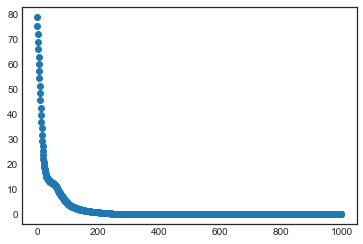

In [283]:
tf.reset_default_graph()
if __name__ == "__main__":
    # Instantiate the rnn_example class
    predictor = rnn_example(input_dim=1, seq_size=4, hidden_dim=10)
    train_x   = [[[1], [2], [3], [4]],
                 [[4], [8], [10], [9]],
                 [[2], [3], [3], [7]],
                 [[1], [9], [2], [2]],
                 [[4], [5], [6], [7]]]
    train_y   = [[1,3,5,7],
                 [4,12,18,19],
                 [2,5,6,10],
                 [1,10,11,4],
                 [4,9,11,13]]
        
    predictor.train(train_x, train_y)
    
    test_x   = [[[7], [4], [3], [1]],
                [[6], [1], [2], [4]],
                [[1], [2], [3], [4]]]
    test_y   = [[[7, 11, 7, 3]],
                [[6, 7, 3, 6]],
                [[1, 3, 5, 7]]]
    
    pred_y = predictor.test(test_x)
    
    print("Running Tests now \n")
    
    for i,x in enumerate(test_x):
        print("When the input is {}".format(x))
        print("The output should be {}".format(test_y[i]))
        print("And the model thinks the output is {}".format(pred_y[i]))
    

In the toy example above, we see that our model does resonably well in predicting the series. Also, the eror decreases and stabilizes very soon.

Now that we are equipped with this powerful tool in machine learning, lets apply this tool to solve real world **Data Science** Problems. 

* Dataset[4] : This is a simple time-series data which shows the number of passengers per day for an airline

In this dataset, the data is "temporal", so a recurrent neural network should work. 

Steps:
* Split the data into train and test.
* Train the RNN model.
* Measure the performance on test data.


In [294]:
'''
A simple utility function to plot the results
'''
def plot_results(train_x, predictions, actual):
    plt.figure()
    num_of_examples = len(train_x)
    num_pred = len(predictions)
    num_act  = len(actual)
    plt.plot([x for x in range(num_of_examples)], train_x, color='b', label='training data')
    plt.plot([x for x in range(num_of_examples,num_of_examples + num_pred)], predictions, color='r', label='predicted')
    plt.plot([x for x in range(num_of_examples,num_of_examples + num_act)], actual, color='g', label='test data')
    plt.legend()
    plt.show()

In this real world example, we will use the same RNN defination we created for our toy example and try to run it for a the airline passengers data. 

Iteration 0 , Error 0.6285951733589172
Iteration 100 , Error 0.04188867285847664
Iteration 200 , Error 0.04071095585823059
Iteration 300 , Error 0.03911297395825386
Iteration 400 , Error 0.03654443100094795
Iteration 500 , Error 0.034432344138622284
Iteration 600 , Error 0.03293871134519577
Iteration 700 , Error 0.0314808152616024
Iteration 800 , Error 0.029798611998558044
Iteration 900 , Error 0.028673067688941956
Model saved : ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
Predicted Values (22,)


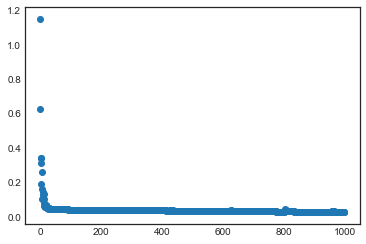

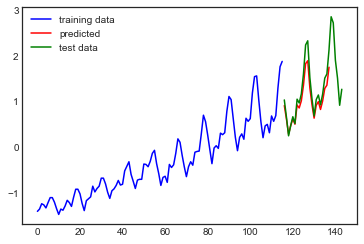

INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tensorflow:Restoring parameters from ./model.ckpt
INFO:tenso

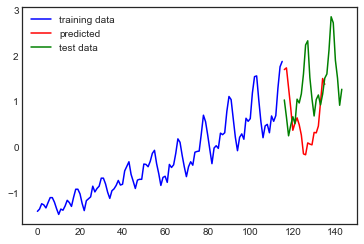

In [320]:
tf.reset_default_graph()
if __name__ == '__main__':
    seq_size = 5
    predictor = rnn_example(input_dim=1, seq_size=seq_size, hidden_dim=100)
    # Load the data
    data = data_loader.load_series('international-airline-passengers.csv')
    train_data, test_data = data_loader.split_data(data)

    train_x, train_y = [], []
    
    # Slides a window through the time-series data to construct the training dataset
    for i in range(len(train_data) - seq_size - 1):
        train_x.append(np.expand_dims(train_data[i:i+seq_size], axis=1).tolist())
        train_y.append(train_data[i+1:i+seq_size+1])

    test_x, test_y = [], []
    for i in range(len(test_data) - seq_size - 1):
        test_x.append(np.expand_dims(test_data[i:i+seq_size], axis=1).tolist())
        test_y.append(test_data[i+1:i+seq_size+1])

    predictor.train(train_x, train_y)

    # The first is prediction results of the model, given the outputs are available for tests examples as well.
    predicted_vals = predictor.test(test_x)[:,0]
    print('Predicted Values', np.shape(predicted_vals))
    plot_results(train_data, predicted_vals, test_data)

    # prediction results when only the training data is given (blue line) and nothing else 
    # This procedure has less information available, but it still did a good job matching trends of the data.
    prev_seq = train_x[-1]
    predicted_vals = []
    for i in range(20):
        next_seq = predictor.test([prev_seq])
        predicted_vals.append(next_seq[-1])
        prev_seq = np.vstack((prev_seq[1:], next_seq[-1]))
    plot_results(train_data, predicted_vals, test_data)

The the above example, we can see how we used RNNs to predict the # of passengers data.
1. The 2nd graph from bottom, shows when the data is predicted given the ground truth i.e. the previous output are available for last predicted date.
2. The bottom graph shows the performance of the RNN, given only the training data.

## Summary
1. TensorFlow gives you a great way to start using RNNs.
2. RNN could be effectively employed where you have temporal data.
3. It has exciting applications on speech recognition, image captioning, machine translation, etc.

I hope that this tutorial will equip you with the basics to explore the exciting world of Recurrent Neural Networks.

**References**
1. https://cs224d.stanford.edu/lectures/CS224d-Lecture7.pdf
2. https://danijar.com/structuring-your-tensorflow-models/
3. http://karpathy.github.io/2015/05/21/rnn-effectiveness/
4. https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line
5. http://tensorflowbook.com/
6. Excellent deep dive : https://ayearofai.com/rohan-lenny-3-recurrent-neural-networks-10300100899b
7. http://colah.github.io/posts/2015-08-Understanding-LSTMs/